# Galactic game sales competition

In [93]:
#import eeeeeeeverything
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [94]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combined=pd.concat([train_df,test_df])

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
combined

,Critic_Count,Critic_Score,Developer,Genre,Id,JP_Sales,NA_Sales,Platform,Publisher,Rating,User_Count,User_Score,Year_of_Release
0,49.0,81.0,SCE Japan Studio,Misc,0,0.06,0.00,PSP,Sony Computer Entertainment,E,62.0,8.3,2008.0
1,NaN,NaN,NaN,Shooter,1,0.00,0.72,2600,Atari,NaN,NaN,NaN,1982.0
2,NaN,NaN,NaN,Action,2,0.00,0.11,XB,THQ,NaN,NaN,NaN,2004.0
3,57.0,54.0,EA Canada,Fighting,3,0.00,0.15,X360,Electronic Arts,T,19.0,6.3,2008.0
4,NaN,NaN,NaN,Action,4,0.01,0.00,DS,Namco Bandai Games,NaN,NaN,NaN,2006.0
5,NaN,NaN,NaN,Racing,5,0.00,0.00,PS2,Activision,NaN,NaN,NaN,2008.0
6,NaN,NaN,Nordic Games Publishing,Racing,6,0.00,0.03,Wii,Nordic Games,E,NaN,tbd,2010.0
7,20.0,59.0,NanaOn-Sha,Simulation,7,1.12,0.10,DS,Atari,E,6.0,7.7,2005.0
8,NaN,NaN,Disney Interactive Studios,Misc,8,0.00,0.18,Wii,Disney Interactive Studios,E,NaN,tbd,2010.0
9,24.0,45.0,EA Tiburon,Sports,9,0.00,0.10,PS3,Electronic Arts,E,NaN,tbd,2008.0


In [96]:
test_df.head()

,Id,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,11703,GB,1996.0,Role-Playing,Nintendo,10.22,NaN,NaN,NaN,NaN,NaN,NaN
1,11704,Wii,2006.0,Misc,Nintendo,2.93,58.0,41.0,6.6,129.0,Nintendo,E
2,11705,NES,1984.0,Shooter,Nintendo,0.28,NaN,NaN,NaN,NaN,NaN,NaN
3,11706,DS,2005.0,Simulation,Nintendo,1.93,NaN,NaN,NaN,NaN,NaN,NaN
4,11707,PS3,2013.0,Action,Take-Two Interactive,0.98,97.0,50.0,8.2,3994.0,Rockstar North,M


In [97]:
train_df.head()

,Id,NA_Sales,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,0.00,PSP,2008.0,Misc,Sony Computer Entertainment,0.06,81.0,49.0,8.3,62.0,SCE Japan Studio,E
1,1,0.72,2600,1982.0,Shooter,Atari,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.11,XB,2004.0,Action,THQ,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.15,X360,2008.0,Fighting,Electronic Arts,0.00,54.0,57.0,6.3,19.0,EA Canada,T
4,4,0.00,DS,2006.0,Action,Namco Bandai Games,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
combined.set_index('Id',inplace=True)

In [99]:
combined.describe()

,Critic_Count,Critic_Score,JP_Sales,NA_Sales,User_Count,Year_of_Release
count,8137.000000,8137.000000,16719.000000,11703.000000,7590.000000,16450.000000
mean,26.360821,68.967679,0.077602,0.267547,162.229908,2006.487356
std,18.980495,13.938165,0.308818,0.851607,561.282326,5.878995
min,3.000000,13.000000,0.000000,0.000000,4.000000,1980.000000
25%,12.000000,60.000000,0.000000,0.000000,10.000000,2003.000000
50%,21.000000,71.000000,0.000000,0.080000,24.000000,2007.000000
75%,36.000000,79.000000,0.040000,0.240000,81.000000,2010.000000
max,113.000000,98.000000,10.220000,41.360000,10665.000000,2020.000000


In [100]:
combined.dtypes

Critic_Count       float64
Critic_Score       float64
Developer           object
Genre               object
JP_Sales           float64
NA_Sales           float64
Platform            object
Publisher           object
Rating              object
User_Count         float64
User_Score          object
Year_of_Release    float64
dtype: object

In [101]:
combined.User_Score.value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
       ... 
2.5      12
9.4      11
2.4      11
2        11
1.7       9
2.1       9
2.9       9
2.7       8
9.5       6
2.2       6
1.8       6
1.4       5
2.6       4
1.6       3
1.2       3
0.6       2
1.5       2
0.9       2
1.3       2
0.3       2
0.5       2
0.7       2
2.3       2
1.1       2
0.2       2
9.6       2
1         2
1.9       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [102]:
combined.loc[combined.User_Score=='tbd'].describe()

,Critic_Count,Critic_Score,JP_Sales,NA_Sales,User_Count,Year_of_Release
count,1082.000000,1082.000000,2425.000000,1679.000000,0.0,2377.000000
mean,11.174677,60.711645,0.002726,0.124139,NaN,2007.455616
std,6.958446,11.193035,0.026130,0.169979,NaN,3.492992
min,4.000000,23.000000,0.000000,0.000000,NaN,1997.000000
25%,6.000000,54.000000,0.000000,0.030000,NaN,2005.000000
50%,9.000000,62.000000,0.000000,0.070000,NaN,2008.000000
75%,14.000000,69.000000,0.000000,0.150000,NaN,2010.000000
max,44.000000,90.000000,0.860000,2.150000,NaN,2020.000000


In [103]:
combined.replace('tbd',np.nan,inplace=True)

In [104]:
combined.User_Score.value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
7.5    251
7.9    249
8.1    244
7.7    240
7.3    236
8.4    223
7.6    220
7      220
7.4    215
8.6    211
6.8    197
8.7    188
8.8    186
7.1    180
7.2    167
8.9    153
6.6    148
6.9    143
6.3    138
6.7    128
6      127
6.5    125
9      120
6.2    113
6.4    107
      ... 
2.5     12
2.4     11
9.4     11
2       11
2.9      9
2.1      9
1.7      9
2.7      8
1.8      6
9.5      6
2.2      6
1.4      5
2.6      4
1.6      3
1.2      3
0.7      2
2.3      2
1.5      2
1.1      2
1.3      2
0.9      2
0.5      2
0.3      2
0.6      2
9.6      2
1        2
0.2      2
1.9      2
9.7      1
0        1
Name: User_Score, Length: 95, dtype: int64

In [105]:
combined.User_Score=combined.User_Score.astype(float)

In [106]:
combined.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [107]:
combined.NA_Sales.sort_values(ascending=False).head()

Id
288     41.36
7187    29.08
9027    23.20
4898    15.68
3727    15.61
Name: NA_Sales, dtype: float64

In [108]:
combined.loc[combined.NA_Sales==combined.NA_Sales.max()]

,Critic_Count,Critic_Score,Developer,Genre,JP_Sales,NA_Sales,Platform,Publisher,Rating,User_Count,User_Score,Year_of_Release
Id,,,,,,,,,,,,
288,51.0,76.0,Nintendo,Sports,3.77,41.36,Wii,Nintendo,E,322.0,8.0,2006.0


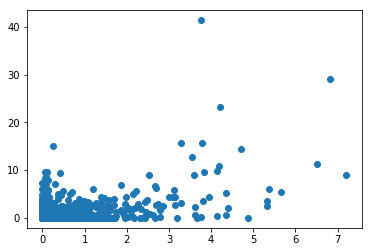

In [109]:
plt.scatter(combined.JP_Sales,combined.NA_Sales,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001931731C780>,
      dtype=object)

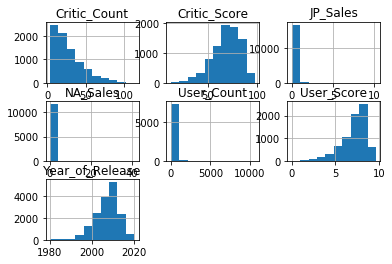

In [110]:
combined.hist()

In [111]:
combined.isna().sum()

Critic_Count       8582
Critic_Score       8582
Developer          6623
Genre                 2
JP_Sales              0
NA_Sales           5016
Platform              0
Publisher            54
Rating             6769
User_Count         9129
User_Score         9129
Year_of_Release     269
dtype: int64

In [112]:
combined.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

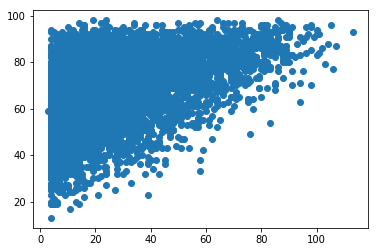

In [113]:
plt.scatter(combined.Critic_Count,combined.Critic_Score)

In [114]:
combined.Critic_Count.min()

3.0

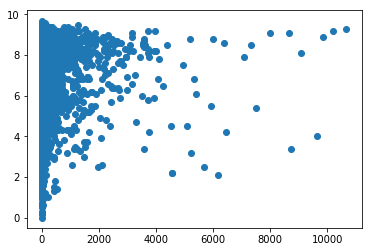

In [115]:
plt.scatter(combined.User_Count,combined.User_Score)

In [116]:
combined.User_Count.min()

4.0

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.1643e+04, 4.1000e+01, 1.1000e+01, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.136,  8.272, 12.408, 16.544, 20.68 , 24.816, 28.952,
        33.088, 37.224, 41.36 ]),
 <a list of 10 Patch objects>)

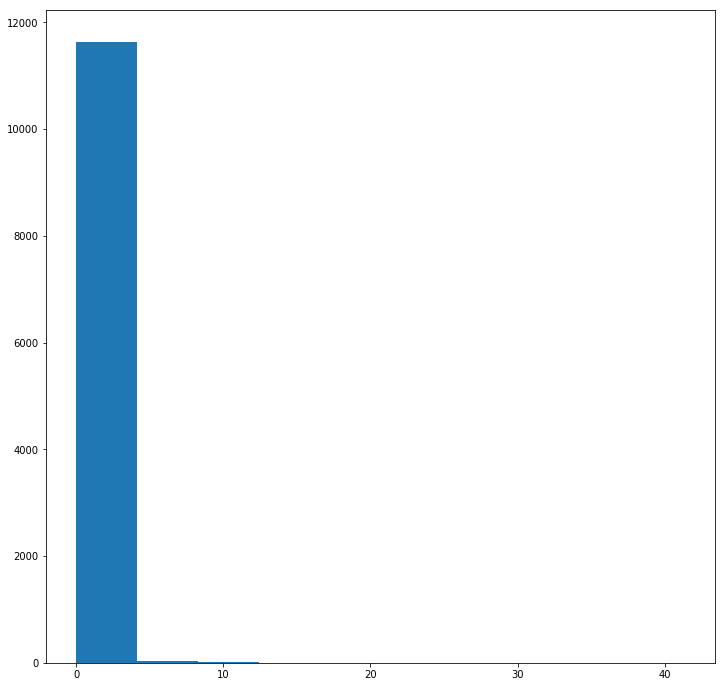

In [117]:
plt.figure(figsize=(12,12))
plt.hist(combined.NA_Sales)

In [118]:
combined.isna().sum()

Critic_Count       8582
Critic_Score       8582
Developer          6623
Genre                 2
JP_Sales              0
NA_Sales           5016
Platform              0
Publisher            54
Rating             6769
User_Count         9129
User_Score         9129
Year_of_Release     269
dtype: int64

In [119]:
train_df.isna().sum()

Id                    0
NA_Sales              0
Platform              0
Year_of_Release     183
Genre                 2
Publisher            39
JP_Sales              0
Critic_Score       6006
Critic_Count       6006
User_Score         4692
User_Count         6371
Developer          4637
Rating             4725
dtype: int64

In [121]:
combined.dtypes

Critic_Count       float64
Critic_Score       float64
Developer           object
Genre               object
JP_Sales           float64
NA_Sales           float64
Platform            object
Publisher           object
Rating              object
User_Count         float64
User_Score         float64
Year_of_Release    float64
dtype: object

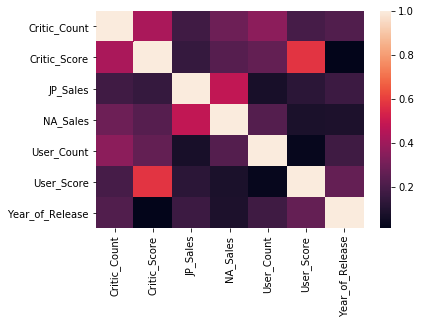

In [123]:
corr=combined.corr()
sns.heatmap(abs(corr))

In [134]:
combined_oh=pd.get_dummies(combined)
combined_oh.head()

,Critic_Count,Critic_Score,JP_Sales,NA_Sales,User_Count,User_Score,Year_of_Release,Developer_10tacle Studios,"Developer_10tacle Studios, Fusionsphere Systems","Developer_1C, 1C Company",...,"Publisher_mixi, Inc",Publisher_responDESIGN,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Id,,,,,,,,,,,,,,,,,,,,,
0,49.0,81.0,0.06,0.00,62.0,8.3,2008.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,NaN,NaN,0.00,0.72,NaN,NaN,1982.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,0.00,0.11,NaN,NaN,2004.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57.0,54.0,0.00,0.15,19.0,6.3,2008.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,NaN,0.01,0.00,NaN,NaN,2006.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
combined.Developer.nunique()

1696

In [130]:
combined.Rating.nunique()

8

In [131]:
for col in combined.columns:
    print(combined[col].nunique())

106
82
1696
12
244
358
31
581
8
888
95
39


In [132]:
combined.columns

Index(['Critic_Count', 'Critic_Score', 'Developer', 'Genre', 'JP_Sales',
       'NA_Sales', 'Platform', 'Publisher', 'Rating', 'User_Count',
       'User_Score', 'Year_of_Release'],
      dtype='object')

In [133]:
combined.Developer.value_counts()

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
EA Tiburon                                108
Electronic Arts                           104
Ubisoft Montreal                          101
Visual Concepts                            99
Omega Force                                80
Traveller's Tales                          77
Vicarious Visions                          76
Activision                                 75
TT Games                                   73
Nintendo                                   72
THQ                                        71
Namco                                      64
Codemasters                                62
Artificial Mind and Movement               61
Midway                                     60
Yuke's                                     59
Harmonix Music Systems            

In [147]:
train_oh=combined_oh.iloc[0:11703]

In [148]:
train_oh.tail()

,Critic_Count,Critic_Score,JP_Sales,NA_Sales,User_Count,User_Score,Year_of_Release,Developer_10tacle Studios,"Developer_10tacle Studios, Fusionsphere Systems","Developer_1C, 1C Company",...,"Publisher_mixi, Inc",Publisher_responDESIGN,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
Id,,,,,,,,,,,,,,,,,,,,,
11698,NaN,NaN,0.13,0.00,NaN,NaN,2007.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11699,6.0,48.0,0.00,0.22,8.0,4.4,2003.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11700,13.0,66.0,0.00,0.09,6.0,5.3,2006.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11701,NaN,NaN,0.01,0.00,NaN,NaN,2011.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11702,13.0,75.0,0.05,0.05,20.0,7.8,2012.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [152]:
X=train_oh.drop(columns='NA_Sales').fillna(0)
y=train_oh['NA_Sales']

In [153]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Add  JP_Sales                       with p-value 0.0
Add  Critic_Count                   with p-value 1.32668e-175
Add  Developer_Good Science Studio  with p-value 1.08921e-87
Add  Developer_Nintendo             with p-value 1.37085e-46
Add  User_Count                     with p-value 3.94287e-47
Add  Genre_Role-Playing             with p-value 1.35652e-42
Add  Developer_Infinity Ward        with p-value 2.836e-33
Add  Developer_Rockstar North       with p-value 1.63136e-22
Add  Publisher_Electronic Arts      with p-value 2.60928e-21
Add  Platform_PC                    with p-value 8.21892e-21
Add  Developer_Treyarch             with p-value 2.0922e-17
Add  Developer_Bungie Software      with p-value 1.5109e-17
Add  Platform_Wii                   with p-value 2.40992e-17
Add  Platform_2600                  with p-value 1.25889e-17
Add  Platform_SNES                  with p-value 1.2073e-14
Add  Developer_DMA Design           with p-value 1.57461e-13
Add  Publisher_Namco Bandai Games   

In [154]:
len(result)

77

In [165]:
train_oh_stepwise=train_oh[result].fillna(0)

In [166]:
linreg=LinearRegression()
linreg.fit(train_oh_stepwise,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
linreg.intercept_,linreg.coef_

(-0.01491730280477832,
 array([ 1.34972511e+00,  5.92565737e-03,  1.39548858e+01,  1.27661699e+00,
         1.97995234e-04, -1.41598078e-01,  2.33561057e+00,  2.49304565e+00,
         2.20501715e-01, -1.59473782e-01,  1.05837843e+00,  3.22081469e+00,
         2.36482703e-01,  6.38651509e-01, -2.46894839e-01,  3.35774705e+00,
        -1.44322094e-01,  1.53956493e-01, -1.14004019e+00, -6.75200048e-01,
         1.94529280e+00, -1.06819129e+00,  1.43152176e-01,  2.23231115e+00,
         2.96244778e-01, -1.35286548e-01, -1.91459335e-01,  3.50190505e+00,
         3.16504922e+00, -1.22476523e-01,  1.30453801e+00,  4.32509130e-01,
         2.19949047e-01,  1.69964955e+00,  5.96925410e-01, -7.44119064e-02,
        -2.75536885e-01,  2.83877254e-01,  3.61402404e-01, -3.58606546e-01,
         2.94498935e-01,  1.16860437e+00,  1.38533754e+00,  1.04711659e+00,
         9.51069096e-01,  3.96207851e-01,  1.35330696e-01,  9.81076786e-02,
         1.44901420e-01, -8.45810484e-01,  2.20941910e-01,  1.242

In [187]:
test_oh_stepwise=combined_oh[result].iloc[11703:].fillna(0)

In [188]:
test_oh_stepwise.head()

,JP_Sales,Critic_Count,Developer_Good Science Studio,Developer_Nintendo,User_Count,Genre_Role-Playing,Developer_Infinity Ward,Developer_Rockstar North,Publisher_Electronic Arts,Platform_PC,...,"Developer_Splash Damage, The Coalition",Developer_TT Fusion,Developer_Rocksteady Studios,Rating_T,Publisher_Westwood Studios,Publisher_Arena Entertainment,Genre_Strategy,Developer_Ryu ga Gotoku Studios,Publisher_Square Enix,"Developer_Ubisoft Paris, Ubisoft Montpellier"
Id,,,,,,,,,,,,,,,,,,,,,
11703,10.22,0.0,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11704,2.93,41.0,0,1,129.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11705,0.28,0.0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11706,1.93,0.0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11707,0.98,50.0,0,0,3994.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


test_oh_stepwise.insert(0, 'constant', 1)

In [191]:
predictions=linreg.predict(test_oh_stepwise)

In [192]:
predictions

array([ 1.36376752e+01,  5.72137029e+00,  3.63005727e-01, ...,
       -1.43018129e-01, -1.42005175e-03,  2.13990784e-01])

In [198]:
prediction_df=pd.DataFrame(predictions,test_oh_stepwise.index,columns=['Prediction'])

In [199]:
prediction_df

,Prediction
Id,
11703,13.637675
11704,5.721370
11705,0.363006
11706,2.590052
11707,5.026849
11708,7.230144
11709,7.995824
11710,3.861448
11711,6.145758


In [200]:
prediction_df.describe()

,Prediction
count,5016.000000
mean,0.253520
std,0.495327
min,-1.370090
25%,0.025574
50%,0.170973
75%,0.347919
max,13.637675


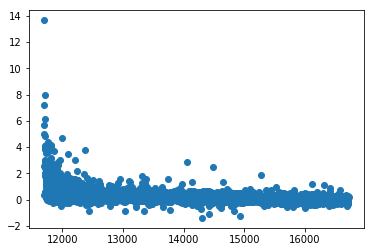

In [202]:
plt.scatter(prediction_df.index,predictions)

In [203]:
prediction_df.loc[prediction_df.Prediction<0]

,Prediction
Id,
11748,-0.014917
11775,-0.131361
11823,-0.099845
11850,-0.255601
11904,-0.052096
11913,-0.167065
11937,-0.006626
11975,-0.504569
11992,-0.026677
